## Imports

In [1]:
import pandas as pd
from plotnine import * 
from sklearn.metrics import average_precision_score, roc_auc_score

## Addresses

In [21]:
model_dir = '/oak/stanford/groups/akundaje/projects/cad/svm_training/'
fig_dir = '/oak/stanford/groups/akundaje/projects/cad/figures'

## Get Model Accuracy

In [6]:
metrics_dict = {'auprc': [],
                'auroc': [],
                'pos_accuracy': [],
                'neg_accuracy': [],
                'cluster': []}

for job in ['c11', 'c12', 'c15', 'c16', 'c18']:
    for i in range(10):
        pos_preds=pd.read_csv(model_dir + job + '/predictions/' + job + '.' + str(i) + '.positives', sep='\t', header=None)
        neg_preds=pd.read_csv(model_dir + job + '/predictions/' + job + '.' + str(i) + '.negatives', sep='\t', header=None)
        pos_preds[2]=1
        neg_preds[2]=-1
        metrics_dict['pos_accuracy'].append(sum(pos_preds[1]>0)/pos_preds.shape[0])    
        metrics_dict['neg_accuracy'].append(sum(neg_preds[1]<0)/neg_preds.shape[0])
        merged=pd.concat([pos_preds,neg_preds],axis=0)
        cur_auprc=average_precision_score(merged[2],merged[1])
        cur_auroc=roc_auc_score(merged[2],merged[1])
        metrics_dict['auprc'].append(cur_auprc)
        metrics_dict['auroc'].append(cur_auroc)
        metrics_dict['cluster'].append(job)

## Make Performance Metrics DataFrame

In [7]:
# metrics_dict = {'metric': [], 'score':[]}

# for i in range(10):
#     metrics_dict['metric'].append('auprc')
#     metrics_dict['score'].append(auprc[i])
#     metrics_dict['metric'].append('auroc')
#     metrics_dict['score'].append(auroc[i])
#     metrics_dict['metric'].append('pos_accuracy')
#     metrics_dict['score'].append(pos_accuracy[i])
#     metrics_dict['metric'].append('neg_accuracy')
#     metrics_dict['score'].append(neg_accuracy[i])

metrics_df = pd.DataFrame.from_dict(metrics_dict)

## Plot Performance Metrics

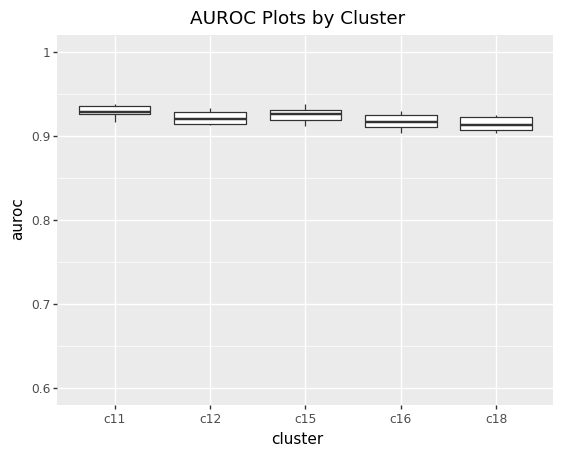

<ggplot: (8793012029873)>

In [17]:
auroc_boxplot = ggplot(metrics_df, aes(x='cluster', y='auroc')) \
                  + geom_boxplot() \
                  + ylim(0.6, 1) \
                  + labs(title='AUROC Plots by Cluster')
display(auroc_boxplot)

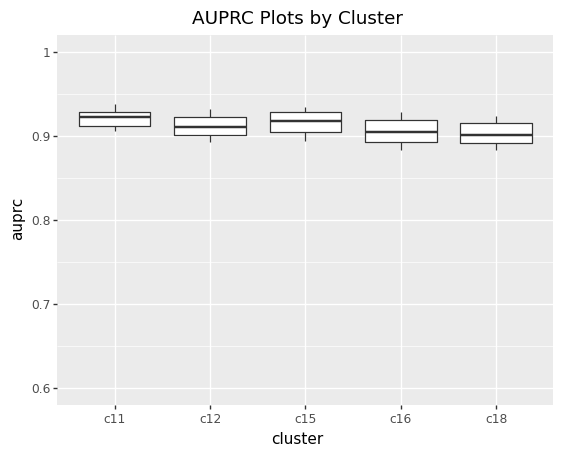

<ggplot: (8793012061641)>

In [18]:
auprc_boxplot = ggplot(metrics_df, aes(x='cluster', y='auprc')) \
                  + geom_boxplot() \
                  + ylim(0.6, 1) \
                  + labs(title='AUPRC Plots by Cluster')
display(auprc_boxplot)

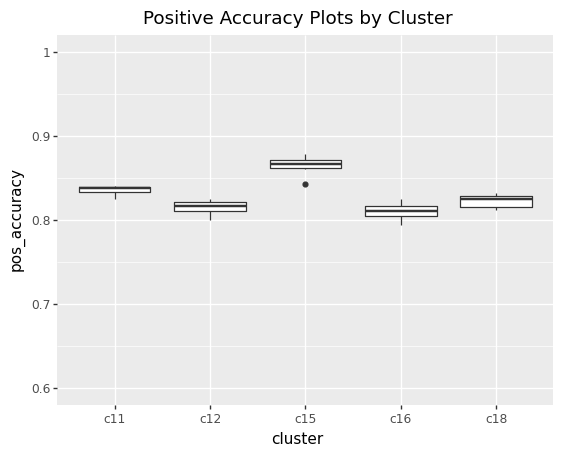

<ggplot: (8793012032073)>

In [19]:
pos_acc_boxplot = ggplot(metrics_df, aes(x='cluster', y='pos_accuracy')) \
                  + geom_boxplot() \
                  + ylim(0.6, 1) \
                  + labs(title='Positive Accuracy Plots by Cluster')
display(pos_acc_boxplot)

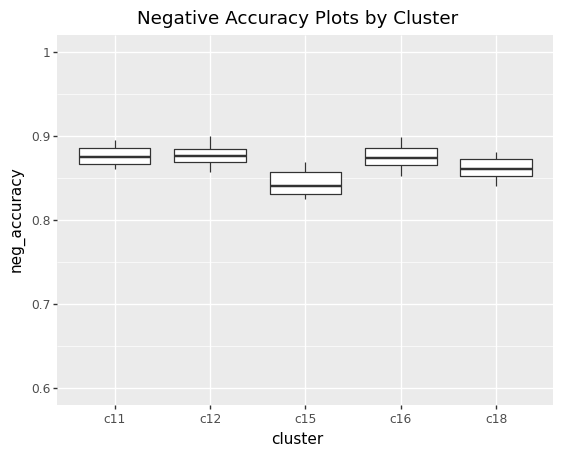

<ggplot: (8793014956837)>

In [20]:
neg_acc_boxplot = ggplot(metrics_df, aes(x='cluster', y='neg_accuracy')) \
                  + geom_boxplot() \
                  + ylim(0.6, 1) \
                  + labs(title='Negative Accuracy Plots by Cluster')
display(neg_acc_boxplot)

## Save Plots

In [24]:
auroc_boxplot.save(filename=fig_dir+'/auroc.png')
auprc_boxplot.save(filename=fig_dir+'/auprc.png')

pos_acc_boxplot.save(filename=fig_dir+'/pos_accuracy.png')
neg_acc_boxplot.save(filename=fig_dir+'/neg_accuracy.png')

/home/groups/akundaje/soumyak/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/groups/akundaje/soumyak/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /oak/stanford/groups/akundaje/projects/cad/figures/auroc.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/home/groups/akundaje/soumyak/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/groups/akundaje/soumyak/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: /oak/stanford/groups/akundaje/projects/cad/figures/auprc.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/home/groups/akundaje/soumyak/miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  f